# Load Processed Data

total 3067
-rw-r--r-- 1 khyat 197609 3124181 Sep 26 15:50 Airbnb.pptx
drwxr-xr-x 1 khyat 197609       0 Oct  1 13:05 Data
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:22 Data_Original
drwxr-xr-x 1 khyat 197609       0 Oct  4 05:31 Data_Output
-rw-r--r-- 1 khyat 197609      25 Oct  3 22:59 README.md
drwxr-xr-x 1 khyat 197609       0 Oct  3 22:57 Scripts
drwxr-xr-x 1 khyat 197609       0 Oct  4 05:21 Visualization_Output
-rw-r--r-- 1 khyat 197609      39 May  9 10:15 apikey.txt
-rw-r--r-- 1 khyat 197609     165 Sep 26 13:19 ~$Airbnb.pptx
                                                    id      name   summary  \
id                                            1.000000  0.014634 -0.004714   
name                                          0.014634  1.000000  0.054027   
summary                                      -0.004714  0.054027  1.000000   
description                                  -0.004469  0.054168  0.999557   
experiences_offered                           0.045731 -0.006763  0.0

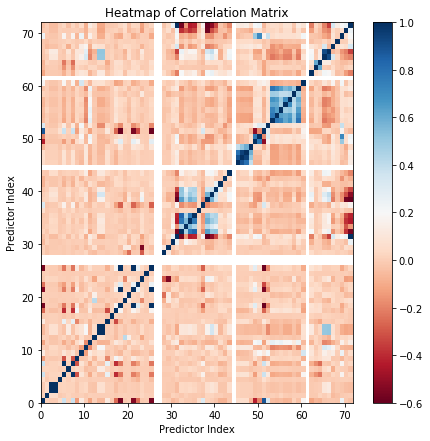

In [1]:
%run ./Airbnb_DataSource_n_DataWrangling.ipynb

In [2]:
df.head(n=2)
# print(df.shape)

,id,name,summary,description,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_group,room_type_num
1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Lots of windows and light. St Luke's Gardens ...,romantic,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom",within a day,100%,1.0,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,t,"London, United Kingdom",RB of Kensington and Chelsea,Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,51.48796,-0.16898,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,50.0,2.0,0.0,3,50,t,1,9,9,203.0,85.0,4,2009-12-21,2019-05-05,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.73,medium,0
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...","Open from June 2018 after a 3-year break, we a...",none,67564,Liz,2010-01-04,"London, England, United Kingdom",within an hour,85%,1.0,Fitzrovia,19.0,19.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,t,"London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United Kingdom,51.52098,-0.14002,Apartment,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,65.0,4.0,10.0,3,365,t,3,14,31,269.0,41.0,12,2011-03-21,2019-06-19,94.0,10.0,9.0,9.0,9.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,14,14,0,0,0.41,high,0


### Google Map to show Price by Location
The below google map can be zoomed in and out. We see that price is more in the city centre and decreases as we go far from the centre. Also, there are more listings in the centre.

In [3]:
df[['latitude', 'longitude']].head()

,latitude,longitude
1,51.48796,-0.16898
2,51.52098,-0.14002
3,51.47298,-0.16376
4,51.44687,-0.21874
5,51.57224,-0.20906


In [4]:
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close
    
# api_key

In [5]:
gmaps.configure(api_key=api_key)

In [6]:
# Get the locations from the data set
locations = df[['latitude', 'longitude']]
#Get the price from the data
price = df['price']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=price))
fig

Figure(layout=FigureLayout(height='420px'))

# Geospatial Analysis (In development, not completed)

In [7]:
# df['geometry'] = df.apply(lambda row: Point(row.latitude, row.longitude), axis=1)
# df[['latitude', 'longitude', 'geometry']].head(n=5)
geometry = df.apply(lambda row: Point(row.latitude, row.longitude), axis=1)

In [8]:
df = geopandas.GeoDataFrame(df, geometry=geometry)

In [9]:
df.crs = {'init':'epsg:4326'}

In [10]:
coder = geopy.Nominatim(user_agent='scipy2019-intermediate-gds')

In [11]:
df.head(2)[['latitude', 'longitude']]\
        .apply(lambda coord: coder.reverse(coord).address, axis=1)

1    HCA Sydney Street, 102, Sydney Street, Chelsea...
2    University of Westminster, 115, New Cavendish ...
dtype: object

In [12]:
# address = coder.reverse((df.latitude[0], df.longitude[0]))
# address

In [13]:
# coder.geocode(address.address)

In [14]:
IFrame(src=df_input.loc[df_input.price.idxmax()].listing_url, width=800, height=800)

In [15]:
# df = df.to_crs(epsg=3857)

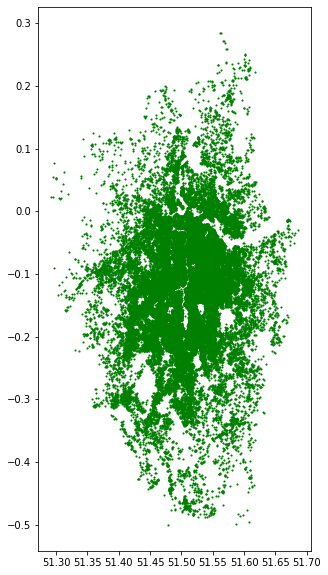

In [16]:
plt.figure(figsize=(10, 10))
df.plot(ax=plt.gca(), marker='.', markersize=5, color='green')